In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


# Loading the dataset 

In [69]:
admission_df= pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

**Checking the head and info of the dataset**

In [70]:
admission_df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [71]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [72]:
admission_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [73]:
admission_df.shape

(500, 9)

From the above tables, we can infer that this problem comes under regression and we can drop the column serial number since this column does not have any influence in the prediction

In [74]:
admission_df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [75]:
admission=admission_df.drop('Serial No.',axis=1)

**After dropping the serial column, the dataset looks as below:**

In [76]:
admission.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72


In [77]:
admission.shape

(500, 8)

In [78]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [79]:
admission.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Exploratory Data Analysis

**Loading the necessary packages**

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt 

Plotting the pairplot 

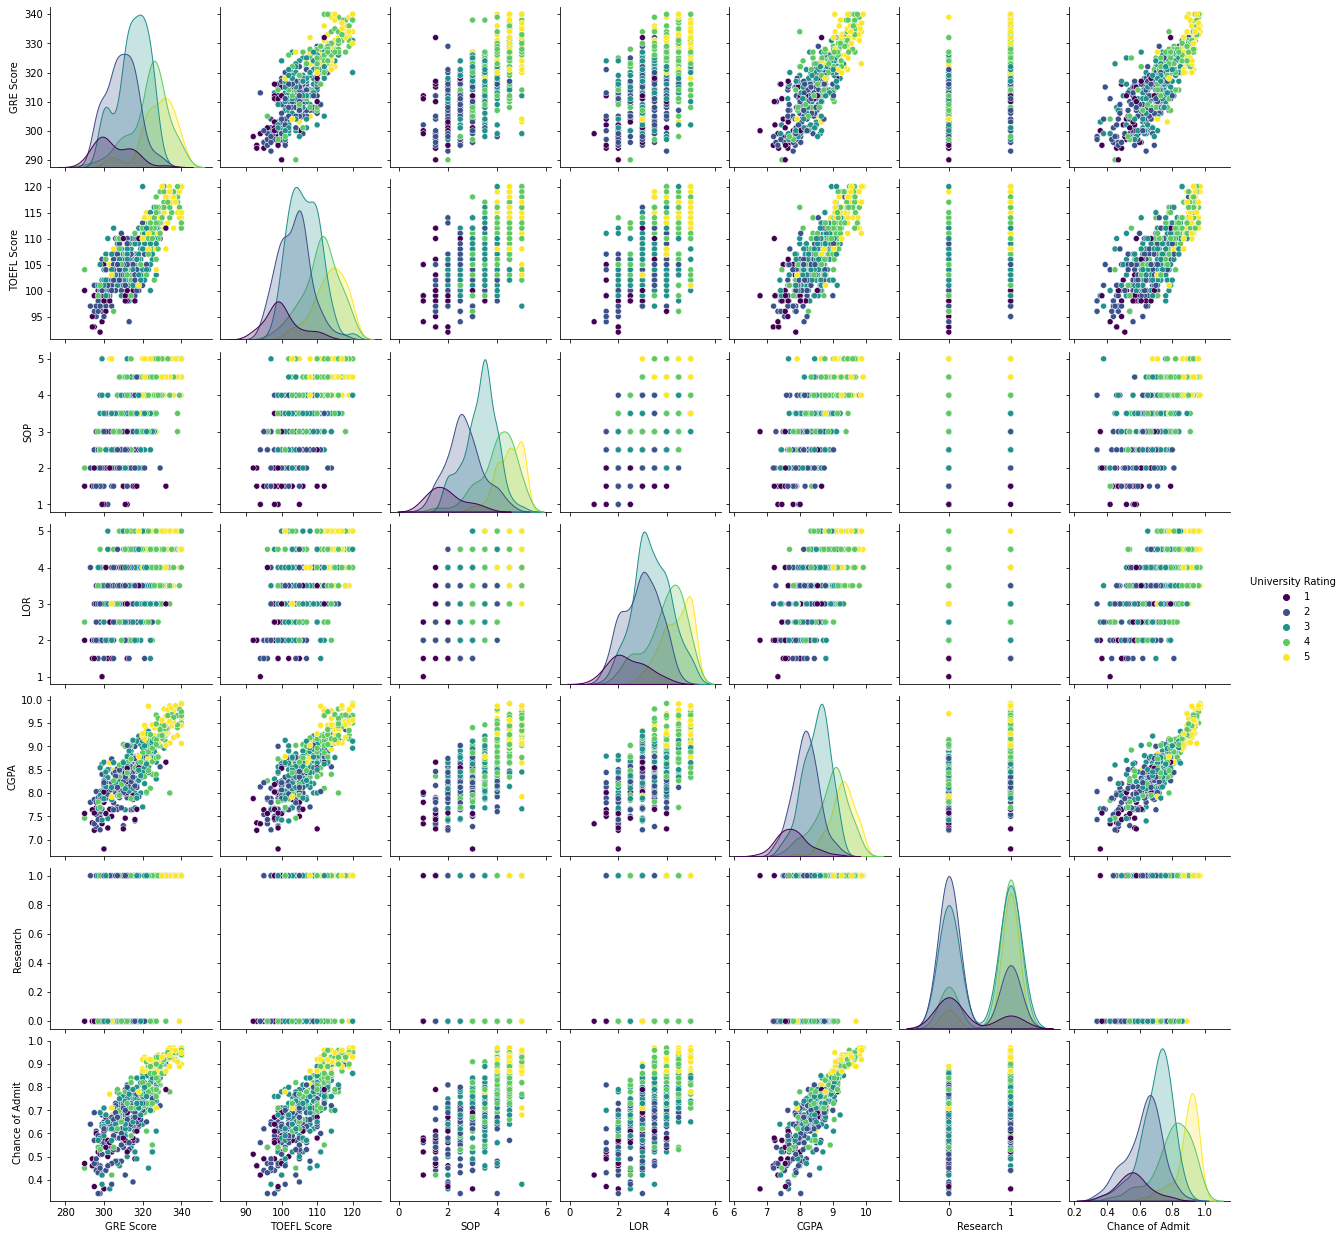

In [81]:
sns.pairplot(admission,hue='University Rating',palette='viridis')

**Plotting the histogram**

<AxesSubplot:xlabel='GRE Score', ylabel='Count'>

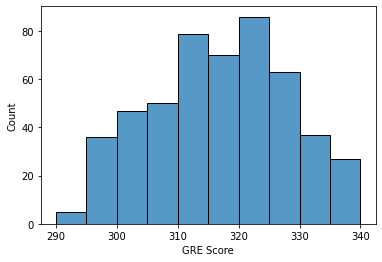

In [82]:
sns.histplot(admission['GRE Score'],bins=10)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<Figure size 2160x2160 with 0 Axes>

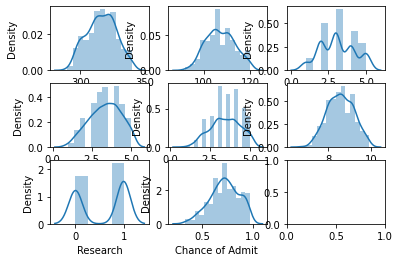

In [83]:
# Define the number of rows and columns you want
plt.figure(figsize=(30,30))
# Create the subplots
n_rows=3
n_cols=3
fig, axes = plt.subplots(nrows=3, ncols=3)

for i, column in enumerate(admission.columns):
    sns.distplot(admission[column],ax=axes[i//n_cols,i%n_cols])
    
    

<AxesSubplot:xlabel='TOEFL Score', ylabel='Count'>

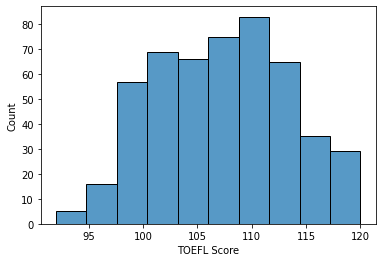

In [84]:
sns.histplot(admission['TOEFL Score'],bins=10)

<AxesSubplot:xlabel='LOR ', ylabel='Count'>

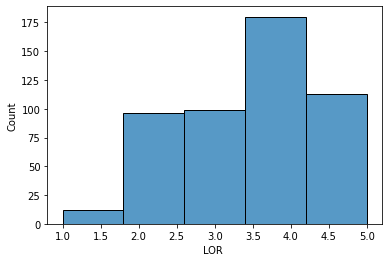

In [85]:
sns.histplot(admission['LOR '],bins=5)

<AxesSubplot:xlabel='SOP', ylabel='Count'>

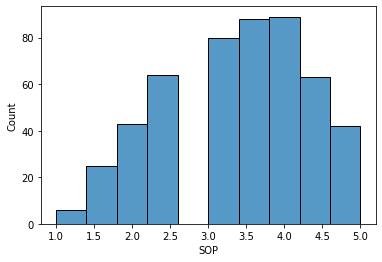

In [86]:
sns.histplot(admission['SOP'],bins=10)

<AxesSubplot:xlabel='University Rating', ylabel='Count'>

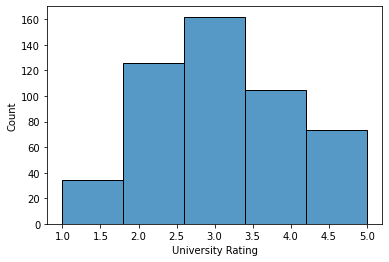

In [87]:
sns.histplot(admission['University Rating'],bins=5)

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

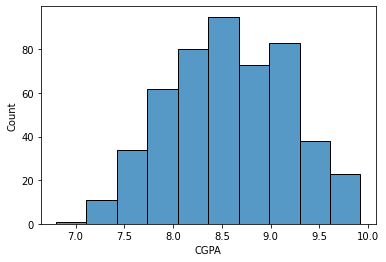

In [88]:
sns.histplot(admission['CGPA'],bins=10)

<AxesSubplot:xlabel='Research', ylabel='Count'>

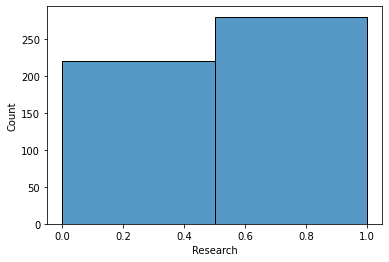

In [89]:
sns.histplot(admission['Research'],bins=2)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

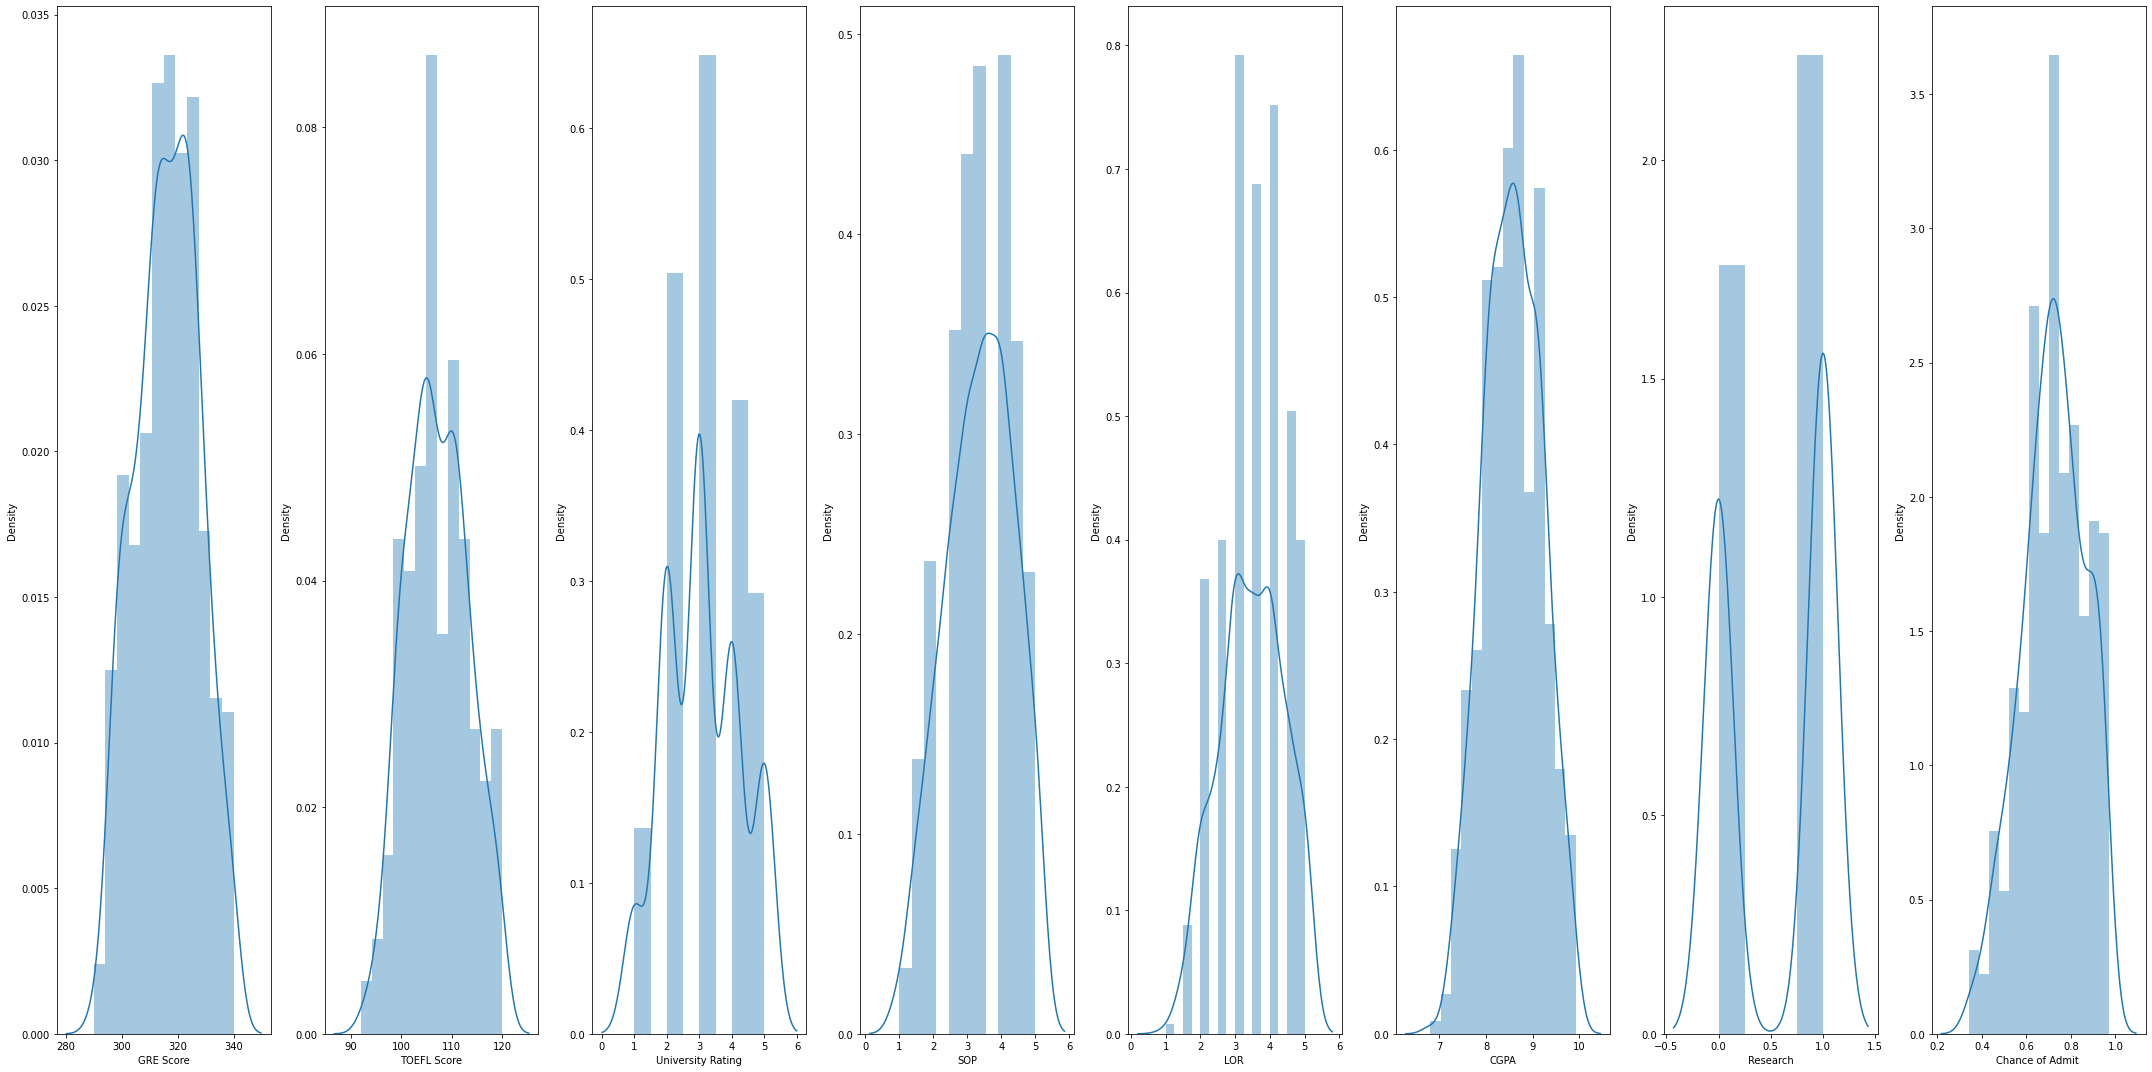

In [90]:
fig, axes = plt.subplots(ncols=len(admission.columns), figsize=(30,15))
for ax, col in zip(axes, admission.columns):
  sns.distplot(admission[col], ax=ax)
  plt.tight_layout() 
plt.show()

In [91]:
admission.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

University Rating and chance of admit for students who has done research

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

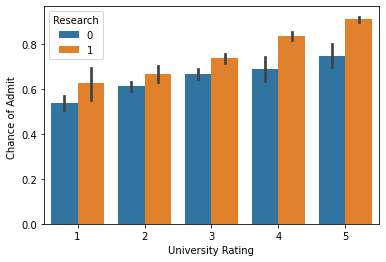

In [92]:
sns.barplot(x='University Rating',y='Chance of Admit ',data=admission,hue="Research")

From this barplot we can infer that a person who has done a research work has higher possibility of getting a admit in all type of university 

**Correlation matrix**

In [93]:
admission.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


**Creating a heatmap**

<AxesSubplot:>

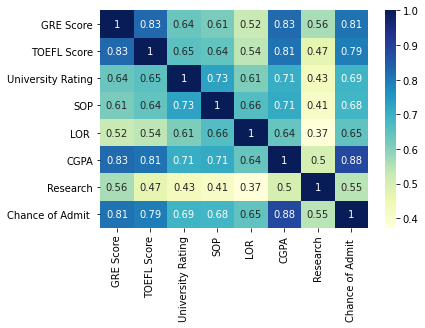

In [94]:
sns.heatmap(admission.corr(),annot=True,cmap='YlGnBu')

We can infer the following from the heatmap:
* Chance of admit is highly correlated with GRE score, TOEFL score and CGPA
* Chance of admit is moderately correalted with University rating, SOP,LOR
* Chance of admit is weakly corelated with Research
* Gre score is highly positively correlated with the TOEFL score
* CGPA is highly correalted with GRE score, TOEFL score

# Regression models

**Splitting the dataset into train and test set**

In [95]:
from sklearn.model_selection import train_test_split

***Creating a 70-30 split***

In [96]:
X=admission.drop('Chance of Admit ',axis=1)
y=admission['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Scaling the data**

In [97]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [98]:
scaler.fit(admission)

StandardScaler()

In [99]:
scaled_admit=pd.DataFrame(scaler.transform(admission))
a=[admission.columns]
scaled_admit.colunms=a
scaled_admit.head(3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340


**Loading the linear regression model**

In [100]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()

In [101]:
linear_reg.fit(X_train,y_train)

LinearRegression()

In [102]:
predict_linear=linear_reg.predict(X_test)

**Evaluating the performance of the model**

In [103]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [104]:
print("MAE :", mean_absolute_error(y_test,predict_linear))
print("MSE :",mean_squared_error(y_test,predict_linear))
print("RMSE :",np.sqrt(mean_squared_error(y_test,predict_linear)))
print("R2 score:", r2_score(y_test,predict_linear))

MAE : 0.04267341377223837
MSE : 0.0036342178012511096
RMSE : 0.06028447396511899
R2 score: 0.8256306039919488


We get a R2 score of 82.56% which is a decent score

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Chance of Admit '>

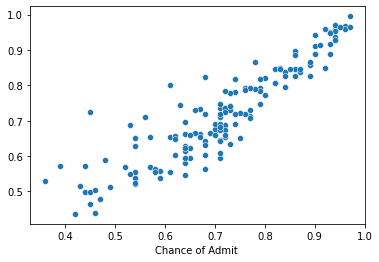

In [105]:
sns.scatterplot(y_test,predict_linear)

The scatterplot explains the linear plot between the 

**Random Forest Regressor**

In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
rf=RandomForestRegressor(n_estimators=100,verbose=3,random_state=42)

In [108]:
rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestRegressor(random_state=42, verbose=3)

In [109]:
rf_pred=rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


**Evaluating the performance of Random Forest**

In [110]:
print("MAE :",mean_absolute_error(y_test,rf_pred))
print("MSE :",mean_squared_error(y_test,rf_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test,rf_pred)))
print("R2 score :",r2_score(y_test,rf_pred))

MAE : 0.04381266666666669
MSE : 0.003986251800000001
RMSE : 0.0631367705857688
R2 score : 0.808740048969349


SVM Regressor

In [111]:
from sklearn.svm import SVR

In [112]:
svr=SVR(verbose=3)

In [113]:
svr.fit(X_train,y_train)

[LibSVM]

SVR(verbose=3)

In [114]:
pred_svr=svr.predict(X_test)

Evaluating the performance of Support Vector Machine

In [115]:
print("MAE :",mean_absolute_error(y_test,pred_svr))
print("MSE :",mean_squared_error(y_test,pred_svr))
print("RMSE :", np.sqrt(mean_squared_error(y_test,pred_svr)))
print("R2 score :",r2_score(y_test,pred_svr))

MAE : 0.06473401079481825
MSE : 0.0068507585511142065
RMSE : 0.0827693092342458
R2 score : 0.6713013099150145


Tuning the parameters such as Cost and gamma for the SVR to improve its performance 

Loading the GridSearch 

In [116]:
from sklearn.model_selection import GridSearchCV

Defining the various values to be used for gamma and cost parameter

In [117]:
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

In [118]:
grid=GridSearchCV(SVR(),param_grid,verbose=3)

In [119]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=   0.0s
[CV 2/5] END ..............................C=0.1

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

In [120]:
grid.best_estimator_

SVR(C=10, gamma=0.001)

In [121]:
grid.best_params_

{'C': 10, 'gamma': 0.001}

In [122]:
grid.best_score_

0.7177248571767686

In [123]:
best_svr_pred=grid.predict(X_test)

Evaluating the performance of the tuned SVR

In [124]:
print("MAE :",mean_absolute_error(y_test,best_svr_pred))
print("MSE :",mean_squared_error(y_test,best_svr_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test,best_svr_pred)))
print("R2 score :",r2_score(y_test,best_svr_pred))

MAE : 0.058442103884809714
MSE : 0.005006624495025648
RMSE : 0.0707575048671563
R2 score : 0.7597826720962628


Neural Network

In [125]:
from tensorflow import keras
from tensorflow.keras import layers

In [126]:
model=keras.Sequential([
    layers.Dense(units=512,activation='relu',input_shape=[7]),
    layers.Dropout(rate=0.3),
    layers.Dense(256,activation='relu'),
    layers.Dropout(rate=0.3),
    layers.Dense(128,activation='relu'),
    layers.Dropout(rate=0.3),
    layers.Dense(1)
    
])

In [127]:
model.compile(
optimizer='adam',
loss='mse')

In [128]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=50,
    verbose=3,
)

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


Minimum Validation Loss: 0.0166


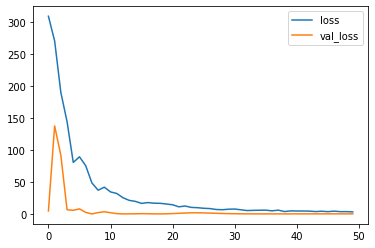

In [129]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

Neural Network with Batch Normalization 

In [130]:
model1=keras.Sequential([
    layers.BatchNormalization(input_shape=[7]),
    layers.Dense(units=512,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(256,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(128,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(1)
    
])

In [131]:
model1.compile(
optimizer='adam',
loss='mse')

In [132]:
history1 = model1.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=50,
    verbose=3,
)

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


Minimum Validation Loss: 0.0106


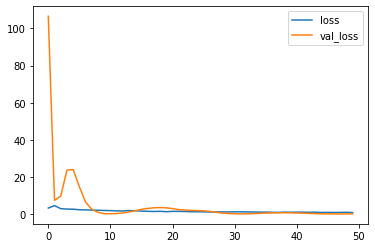

In [133]:
history_df = pd.DataFrame(history1.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

In [134]:
print(history_df.head(3))
print("\n")
print("Head of y_test: ")
print(y_test.head(3))

       loss    val_loss
0  3.172327  106.602036
1  4.496631    7.297913
2  2.844502    9.614933


Head of y_test: 
361    0.93
73     0.84
374    0.39
Name: Chance of Admit , dtype: float64


# Result

Comparing the Mean Squared error and R2 score of the model, we can infer that the linear regression model performs better compared to all the other models with an accuracy of 82.58%.